In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# G2M insight for Cab Investment Firm 

# Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision. Data provided consists of key features from two cab companies: Pink Cab and Yellow Cab. Research and analysis will be done on these two companies throughout the notebook and will come down to a recommendation of one these cab companies for XYZ to invest in. 


# Data Cleaning

Here I loaded and assigned all our data csv files to a name that can be accessed as a dataframe to use in this notebook. 
`cab_transactions` is a dataframe that contains the details of transactions for 2 cab companies such as `Transaction ID`, `Price Charged`, and `KM Travelled`. `customer_info` contains information on each customer's demographic such as gender, age, and income. `transaction_mapping` is similar to cab_transactions except it has the customer ID and the type of payment(card, cash, etc.) `city_info` has information on the population and number of cab users in each city.

In [2]:
cab_transactions = pd.read_csv("data/Cab_Data.csv")
customer_info = pd.read_csv("data/Customer_ID.csv")
transaction_mapping = pd.read_csv("data/Transaction_ID.csv")
city_info = pd.read_csv("data/City.csv")

The `Date of Travel` column of `cab transactions` had numerical data values given instead of actual dates. Using the date January 01, 1900 as a reference date, converted `Date of Travel` to an actual date format of year-month-day. The first 5 rows of `cab_transactions` is given to show this change in `Date of Travel`.

In [3]:
for col in cab_transactions.columns:
    if ' ' in col:
        cab_transactions = cab_transactions.rename(columns={col:col.replace(' ','_')})

In [4]:
for col in customer_info.columns:
    if ' ' in col:
        customer_info = customer_info.rename(columns={col:col.replace(' ','_')})

In [5]:
for col in transaction_mapping.columns:
    if ' ' in col:
        transaction_mapping = transaction_mapping.rename(columns={col:col.replace(' ','_')})

In [6]:
for col in city_info.columns:
    if ' ' in col:
        city_info = city_info.rename(columns={col:col.replace(' ','_')})

In [7]:
reference_date = pd.to_datetime("1900-01-01")
cab_transactions['Date_of_Travel'] = reference_date + pd.to_timedelta(cab_transactions['Date_of_Travel'], unit = 'D') 
cab_transactions.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# Appending New Features / Visualizations

Started off wanting to know the profit of each company in different ways to get a better understanding on which company is "better" to invest in. appended new features to `cab_transactions` that were calculated from the data already provided in the original cab_transactions such as `Profit` and `Profit per KM`. `Profit` was calculated by subtracting `Cost of Trip` from `Price Charged` and `Profit per KM` calculated by dividing `Profit` by `KM Travelled`. The feature `Year` was created by iterating through each datetime in `Date of Travel` and taking the year of it and appending it to a years array to append onto our dataframe. Noticed some rows of our data had a `Year` of 2019 so I removed these rows since we are only focusing on the years 2016 to 2018. 

In [8]:
months = []
years = []
for i in cab_transactions["Date_of_Travel"]:
    years.append(i.year)
    months.append(i.month)
cab_transactions["Year"] = years
cab_transactions["Month"] = months

In [9]:
cab_transactions["Profit"] = cab_transactions["Price_Charged"] - cab_transactions["Cost_of_Trip"]
cab_transactions["Profit_per_KM"] = cab_transactions["Profit"] / cab_transactions["KM_Travelled"] 
indexAge = cab_transactions[cab_transactions["Year"] == 2019].index
cab_transactions.drop(indexAge, inplace = True)
cab_transactions.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,Profit_per_KM
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,57.315,1.882266
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,23.666,0.826904
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,27.568,3.049558
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,25.798,0.777751
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,16.844,1.929439


In [10]:
Pink_Cab = cab_transactions[cab_transactions["Company"] == "Pink Cab"]
Yellow_Cab = cab_transactions[cab_transactions["Company"] == "Yellow Cab"]

/var/folders/hs/njlf7p7940bgfz0_0_xhztnr0000gn/T/ipykernel_22874/1436372156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Pink_Cab['KM_Travelled'], kde=False, color='blue', bins=80)


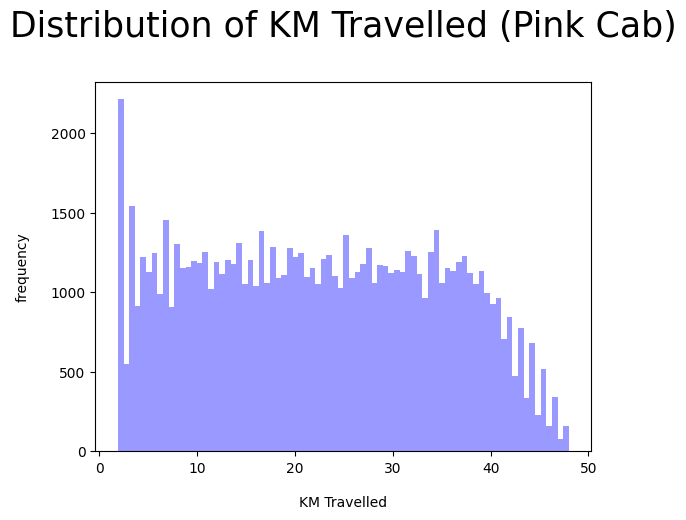

In [11]:
ax = sns.distplot(Pink_Cab['KM_Travelled'], kde=False, color='blue', bins=80)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=25, y=1.1)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

/var/folders/hs/njlf7p7940bgfz0_0_xhztnr0000gn/T/ipykernel_22874/709562769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Yellow_Cab['KM_Travelled'], kde=False, color='red', bins=80)


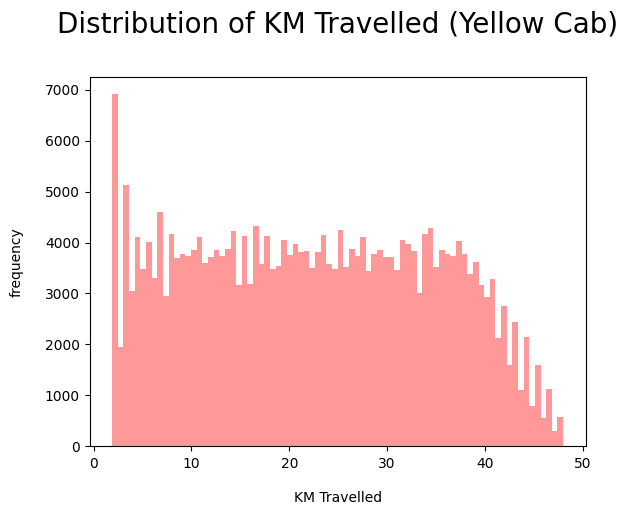

In [12]:
ax = sns.distplot(Yellow_Cab['KM_Travelled'], kde=False, color='red', bins=80)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.1)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

Plotted the distribution of `KM Travelled` for both companies and shows that the distributino of the distance travelled by cab users of both companies is roughly the same except that the Yellow Cab company has much higher frequency. 

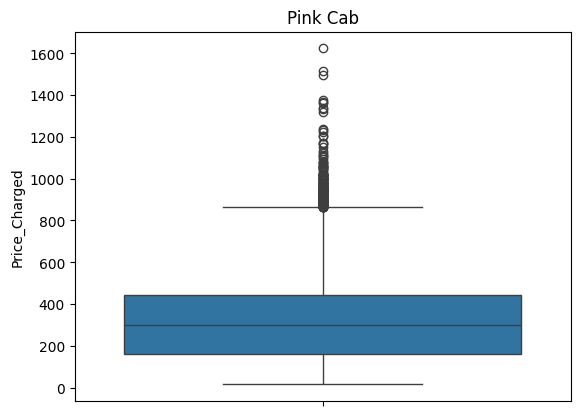

In [13]:
ax1 = sns.boxplot(Pink_Cab['Price_Charged'])
ax1.set_title('Pink Cab')
plt.show()

Text(0.5, 1.0, 'Yellow Cab')

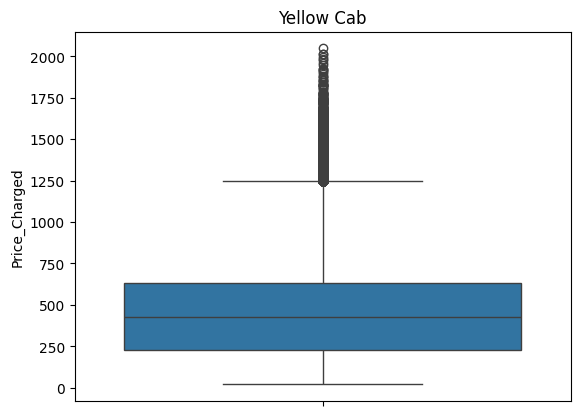

In [14]:
ax2 = sns.boxplot(Yellow_Cab['Price_Charged'])
ax2.set_title('Yellow Cab')

Created boxplots of the `Price_Charged` by both companies and found siginificant outliers of higher prices, but these outliers will not be taken out as these are prices charged to higher income customers paying for higher end vehicles/service. 

Used a relplot of kind = "line" to get an overall visualization of the entire dataset and the trend between `Profit` and `KM_Travelled`. From the plot below the distance between the data of Yellow Cab and Pink Cab grow as `KM_Travelled` increases. Both plots of the two companies also show a positive correlation between `KM_Travelled` and `Profit` with the Yellow Cab having a stronger positive correlation. 

/Users/josephpang/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


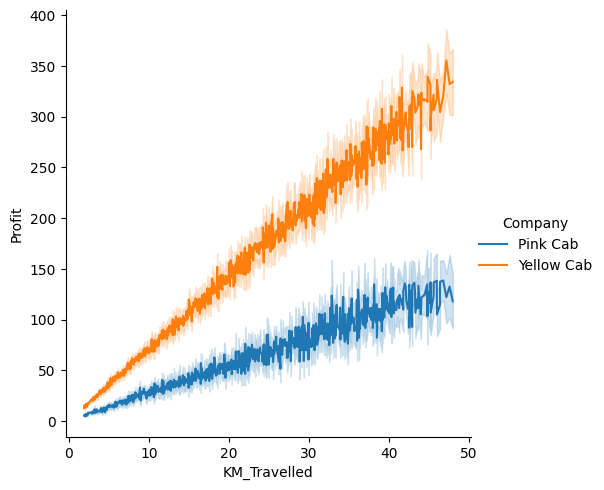

In [15]:
sns.relplot(data = cab_transactions, x = "KM_Travelled", y = "Profit", hue = "Company", kind = "line")

In [16]:
pink_transactions = cab_transactions[cab_transactions["Company"] == "Pink Cab"] 
yellow_transactions = cab_transactions[cab_transactions["Company"] == "Yellow Cab"]

In [17]:
pink_transactions["KM_Travelled"].corr(pink_transactions["Profit"])

0.44230516330165676

In [18]:
yellow_transactions["KM_Travelled"].corr(yellow_transactions["Profit"])

0.5033904407559667

Created a smaller sub-dataframe of cab_transactions by grouping the `Company` and `Year` and their corresponding average profit. Then used this dataframe to create a comparative bar plot of the average profit of both companies for each year. Using the same process but now instead of `Profit` I used `Profit per KM` for more visual understanding of the companie's differences.

                 Average_Profit
Company    Year                
Pink Cab   2016       67.892815
           2017       67.107856
           2018       53.604443
Yellow Cab 2016      169.374758
           2017      168.885819
           2018      143.755337


Text(0.5, 1.0, 'Average_Profit_of_Companies_Each_Year')

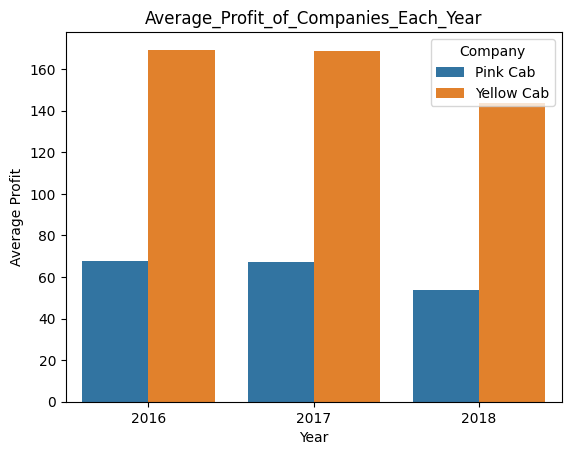

In [19]:
average_profit_year = cab_transactions[['Company', 'Profit', 'Year']]
average_profit_year = average_profit_year.groupby(by = ["Company", "Year"]).mean().rename(columns = {"Profit" : "Average_Profit"})
print(average_profit_year)
sns.barplot(data = average_profit_year, x = "Year", y = "Average_Profit", hue = "Company")
plt.ylabel("Average Profit")
plt.title("Average_Profit_of_Companies_Each_Year")

                 Average_Profit_per_KM
Company    Year                       
Pink Cab   2016               3.010937
           2017               2.961975
           2018               2.367763
Yellow Cab 2016               7.490667
           2017               7.496330
           2018               6.379734


Text(0.5, 1.0, 'Average Profit per KM of Companies Each Year')

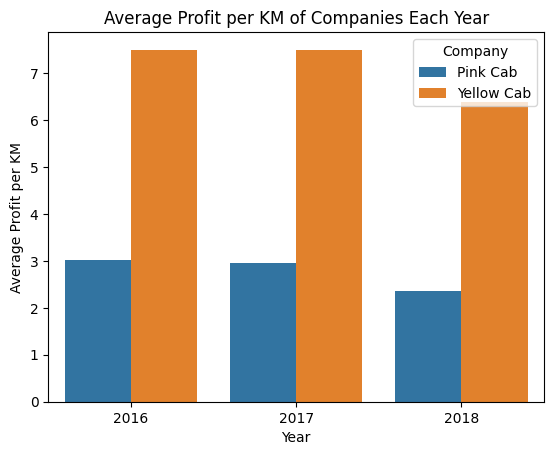

In [20]:
average_profit_KM = cab_transactions[['Company', 'Profit_per_KM', 'Year']]
average_profit_KM = average_profit_KM.groupby(by = ["Company", "Year"]).mean().rename(columns = {"Profit_per_KM" : "Average_Profit_per_KM"})
print(average_profit_KM)
sns.barplot(data = average_profit_KM, x = "Year", y = "Average_Profit_per_KM", hue = "Company")
plt.ylabel("Average Profit per KM")
plt.title("Average Profit per KM of Companies Each Year")

The same idea as the previous cells but now plotting the total profit of the companies for each year with a lineplot. 

                 Total_Profit
Company    Year              
Pink Cab   2016  1.686458e+06
           2017  2.033435e+06
           2018  1.578972e+06
Yellow Cab 2016  1.378694e+07
           2017  1.658661e+07
           2018  1.360946e+07


<Axes: xlabel='Year', ylabel='Total_Profit'>

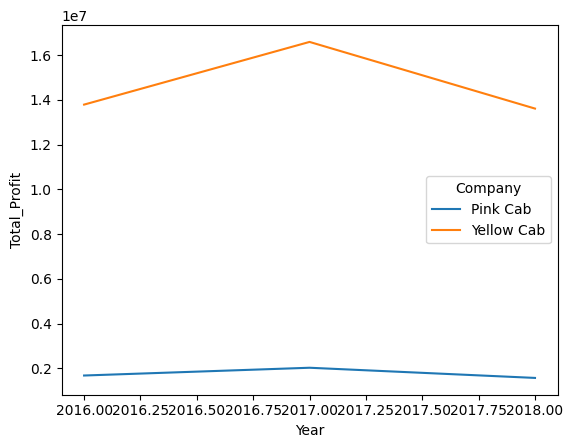

In [21]:
total_profit_year = cab_transactions[["Company", "Profit", "Year"]]
total_profit_year = total_profit_year.groupby(by = ["Company", "Year"]).sum().rename(columns={"Profit" : "Total_Profit"})
print(total_profit_year)
sns.lineplot(data = total_profit_year, x = "Year", y = "Total_Profit", hue = "Company")

After calculating and visualizing the profit of both companies and comparing them we can see that the Yellow Cab company has more average and total profit than the Pink Cab company every year of 2016 to 2018. However, with this in mind there are many other features to take into consideration from the other datasets provided to us such as gender, age, income, and location.

# Customer Demographic's Correlation to Profit

To see the correlation between the different customer feature's such as `Gender`, `Age`, etc. we merged our data together to create a `master_data` dataframe that shows unique customers and their corresponding transactions of cabs. 

In [22]:
transaction_mapping.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [23]:
customer_info.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [24]:
master_data = cab_transactions.merge(transaction_mapping, on = "Transaction_ID")

In [25]:
master_data = master_data.merge(customer_info, on = "Customer_ID")
master_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,Profit_per_KM,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,57.3150,1.882266,29290,Card,Male,28,10813
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,281.2772,10.739870,29290,Cash,Male,28,10813
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,194.6480,4.574571,29290,Card,Male,28,10813
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,23.6660,0.826904,27703,Card,Male,27,9237
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,253.9808,6.981330,27703,Card,Male,27,9237


In [26]:
pink_data = master_data[master_data["Company"] == "Pink Cab"]
yellow_data = master_data[master_data["Company"] == "Yellow Cab"]

In [27]:
pink_gender_profit = pink_data[["Profit", "Month", "Gender"]]
pink_gender_profit = pink_gender_profit.groupby(by = ["Gender", "Month"]).sum()
yellow_gender_profit = yellow_data[["Profit", "Month", "Gender"]]
yellow_gender_profit = yellow_gender_profit.groupby(by = ["Gender", "Month"]).sum()

Text(0.5, 1.0, "Yellow Cab's Profit by Gender")

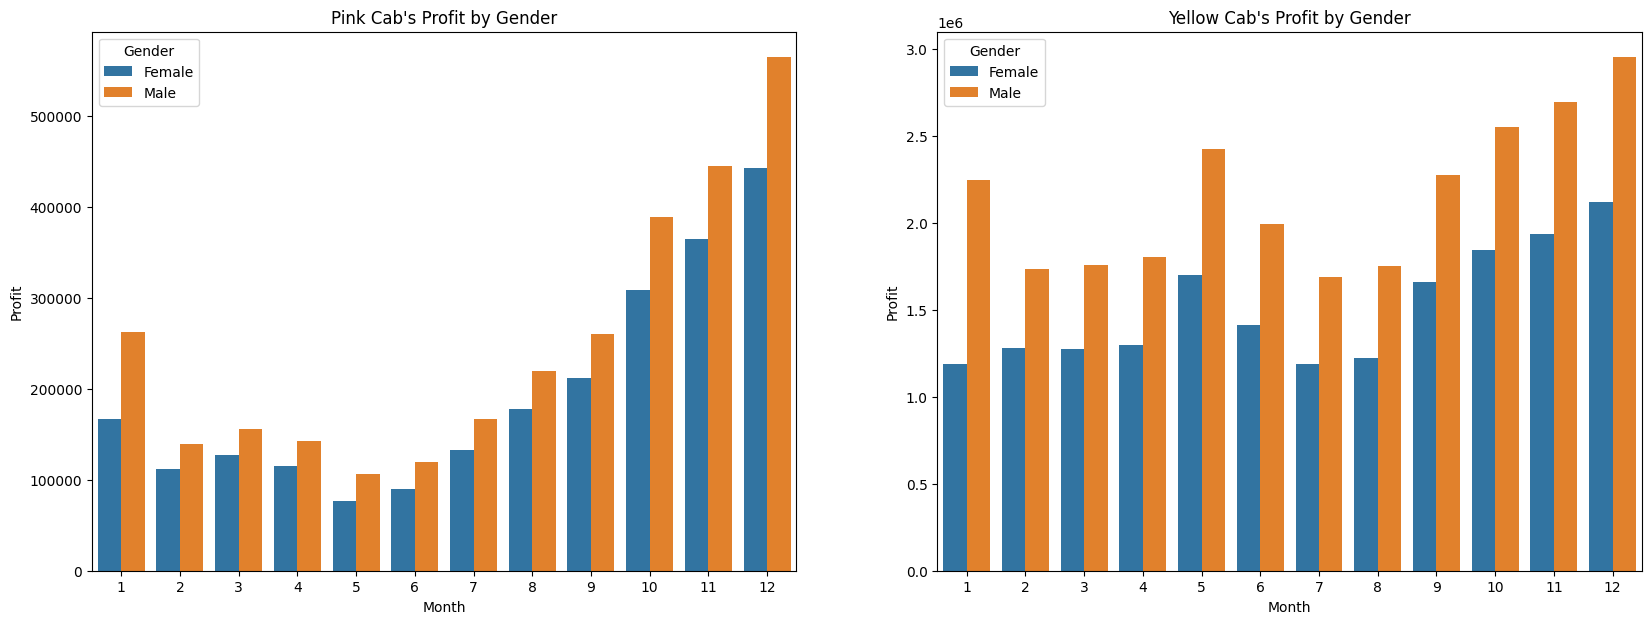

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.barplot(data = pink_gender_profit, x = "Month", y = "Profit", hue = "Gender", ax = ax1)
ax1.set_title("Pink Cab's Profit by Gender")
sns.barplot(data = yellow_gender_profit, x = "Month", y = "Profit", hue = "Gender", ax = ax2)
ax2.set_title("Yellow Cab's Profit by Gender")

The total profit on a month to month basis appears to be almost equal between the two genders. However, it is notable that the Yellow Cab's difference in profit by gender seems to be bigger than the difference in profit by gender for Pink Cab. 

In [29]:
pink_young_adult = pink_data[pink_data["Age"] < 30] 
pink_adult = pink_data[(pink_data["Age"] >= 30) & (pink_data["Age"] < 50)]
pink_elder = pink_data[(pink_data["Age"] >= 50) & (pink_data["Age"] < 65)]
pink_senior = pink_data[pink_data["Age"] >= 65] 

In [30]:
yellow_young_adult = yellow_data[yellow_data["Age"] < 30] 
yellow_adult = yellow_data[(yellow_data["Age"] >= 30) & (yellow_data["Age"] < 50)]
yellow_elder = yellow_data[(yellow_data["Age"] >= 50) & (yellow_data["Age"] < 65)]
yellow_senior = yellow_data[yellow_data["Age"] >= 65] 

In [31]:
pink_age_sum = {"Total_Profit" : [pink_young_adult["Profit"].sum(), pink_adult["Profit"].sum(), pink_elder["Profit"].sum(), pink_senior["Profit"].sum()]}
pink_age_df = pd.DataFrame(data = pink_age_sum)
pink_age_df["Age_Range"] = ["18-29", "30-49", "50-64", "65+"]
pink_age_df = pink_age_df.set_index("Age_Range")
yellow_age_sum = {"Total_Profit" : [yellow_young_adult["Profit"].sum(), yellow_adult["Profit"].sum(), yellow_elder["Profit"].sum(), yellow_senior["Profit"].sum()]}
yellow_age_df = pd.DataFrame(data = yellow_age_sum)
yellow_age_df["Age_Range"] = ["18-29", "30-49", "50-64", "65+"]
yellow_age_df = yellow_age_df.set_index("Age_Range")

Text(0.5, 1.0, "Yellow Cab's Profit based on Age")

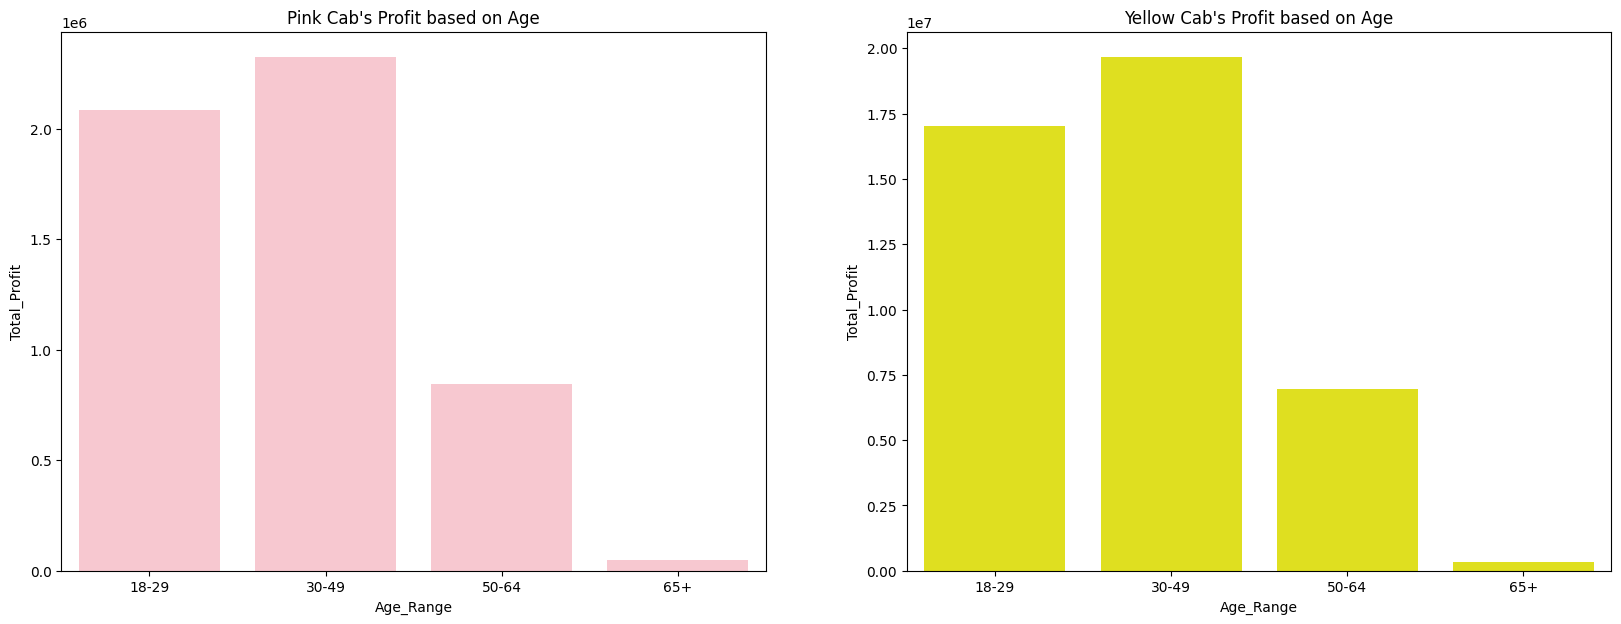

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.barplot(data = pink_age_df, x = "Age_Range", y = "Total_Profit", color="pink", ax = ax1)
ax1.set_title("Pink Cab's Profit based on Age")
sns.barplot(data = yellow_age_df, x = "Age_Range", y = "Total_Profit", color="yellow", ax = ax2)
ax2.set_title("Yellow Cab's Profit based on Age")

The general trend of profit for both the Pink Cab and Yellow Cab companies are almost the same in terms of different age groups.

In [33]:
city_y = yellow_data.groupby('City').Transaction_ID.count()
city_p = pink_data.groupby('City').Transaction_ID.count()

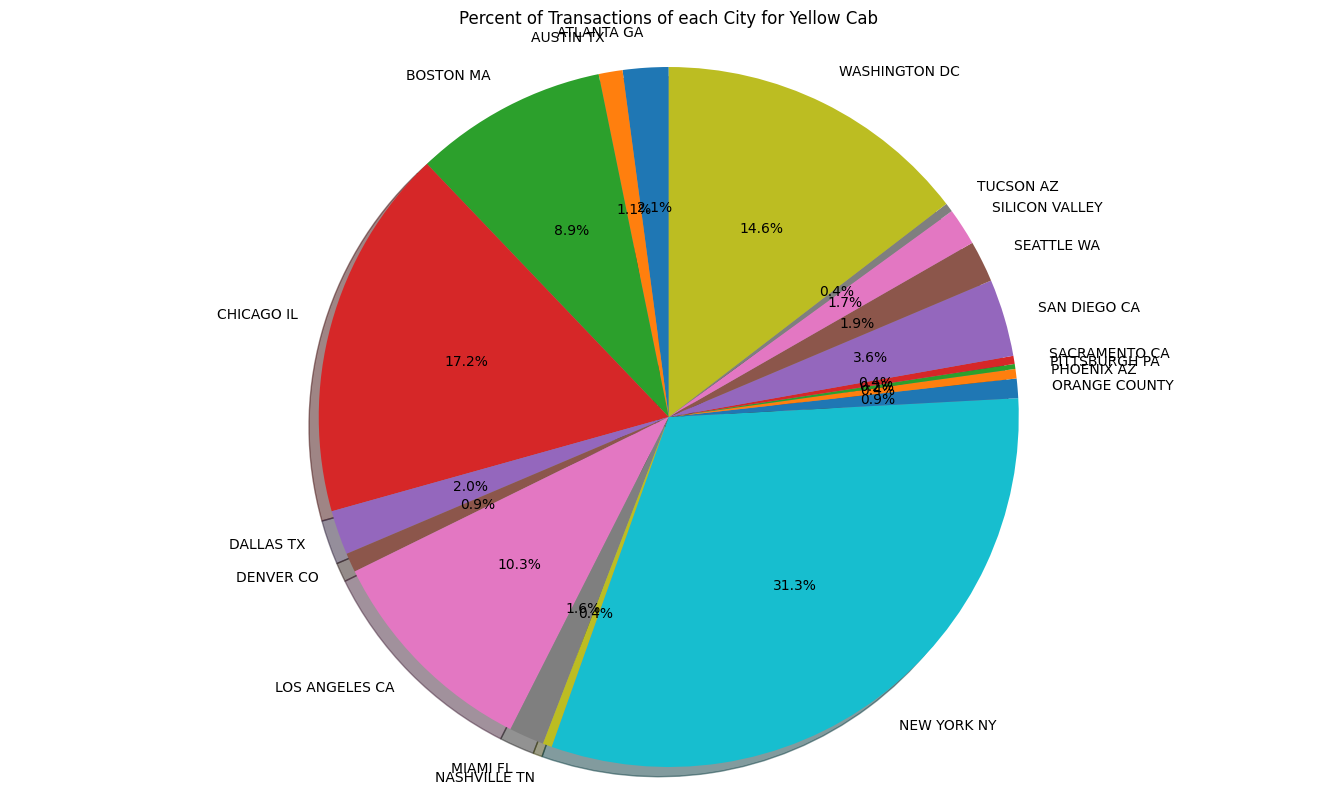

In [34]:
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(city_y.values , labels=city_y.index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percent of Transactions of each City for Yellow Cab')
plt.show()

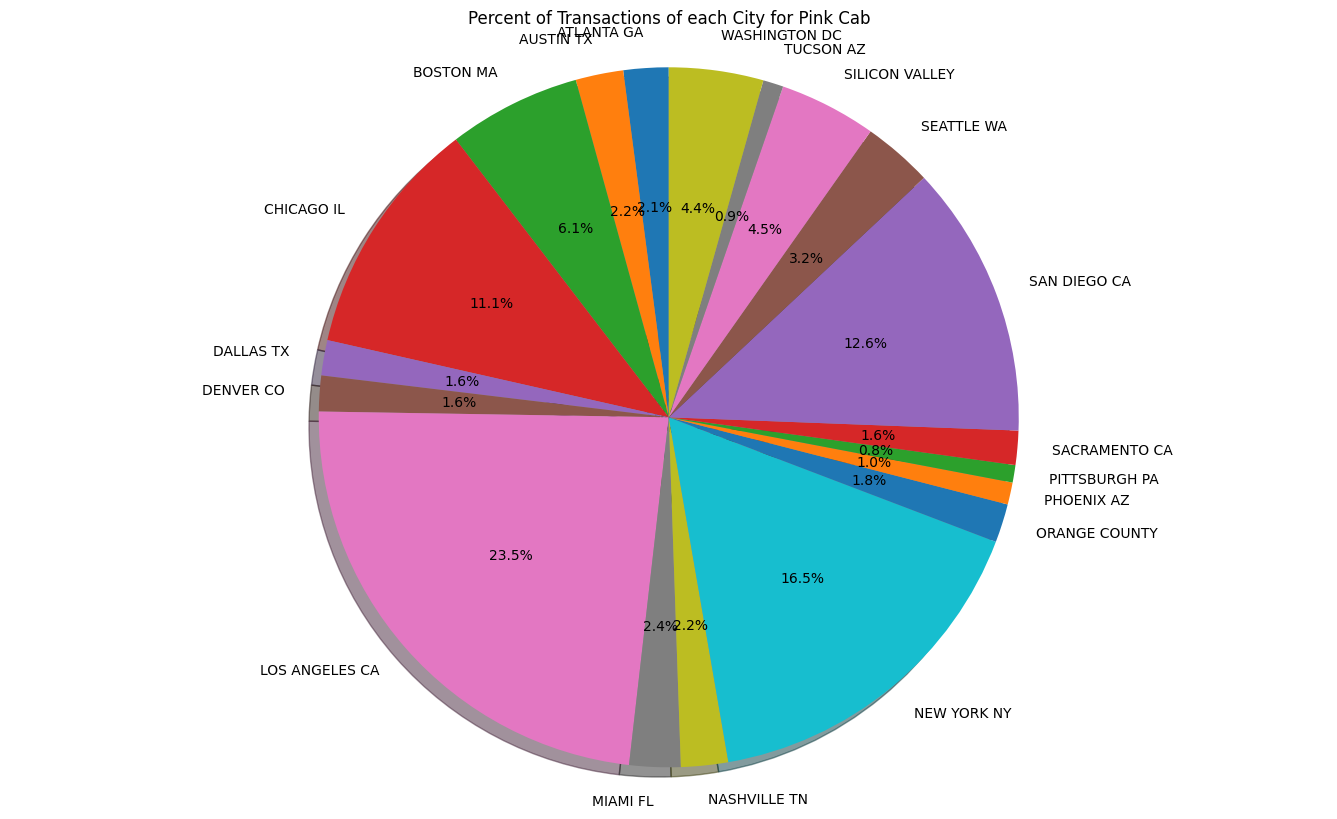

In [35]:
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(city_p.values , labels=city_p.index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percent of Transactions of each City for Pink Cab')
plt.show()

Yellow Cab's highest percentage of transactions(31.3%) occur in New York while Pink Cab's highest percentage of transactions(23.5%) are in Los Angeles. 

# Retention Rate

In [72]:
pink_customer_count = pink_data.groupby(by = "Customer_ID").count() 
pink_customer_count = pink_customer_count[["Transaction_ID"]].rename(columns = {"Transaction_ID" : "Transaction_Count"})
pink_good_retention = pink_customer_count[pink_customer_count["Transaction_Count"] > 5]
yellow_customer_count = yellow_data.groupby(by = "Customer_ID").count() 
yellow_customer_count = yellow_customer_count[["Transaction_ID"]].rename(columns = {"Transaction_ID" : "Transaction_Count"})
yellow_good_retention = yellow_customer_count[yellow_customer_count["Transaction_Count"] > 5]

Text(0.5, 1.0, "Percentage of 'Good' Rentention Rate Customers")

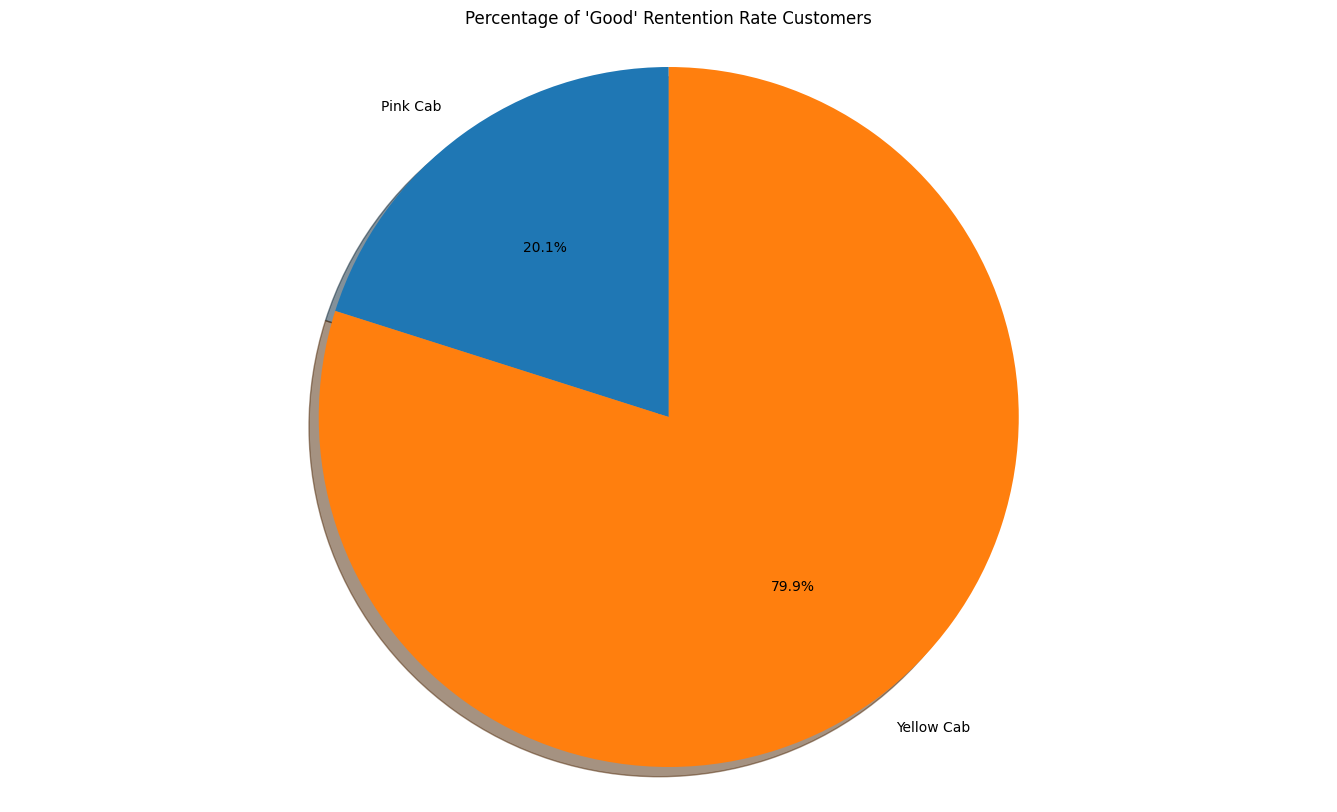

In [73]:
figp, axp = plt.subplots(figsize=(17,10))
axp.pie([pink_good_retention["Transaction_Count"].count(), yellow_good_retention["Transaction_Count"].count()]
        , labels = ["Pink Cab", "Yellow Cab"], autopct='%1.1f%%', shadow=True, startangle=90)
axp.axis('equal')
plt.title("Percentage of 'Good' Rentention Rate Customers")

In [89]:
retention_count = pink_customer_count.merge(yellow_customer_count, on = "Customer_ID")
retention_count = retention_count.rename(columns = {"Transaction_Count_x" : "Transaction_Count_p"})
retention_count

,Transaction_Count_p,Transaction_Count_y
Customer_ID,,
1,4,25
2,4,36
3,6,40
4,1,25
5,8,23
...,...,...
59995,2,11
59997,2,8
59998,3,6


The Yellow Cab company has significantly more customers with "good" retention rates than the Pink Cab. Good retention rate customers are customers who have taken more than 5 cab rides from their respective company.

In [93]:
pink_high_income = pink_data[pink_data["Income_(USD/Month)"] > 8000] 
pink_middle_income = pink_data[(pink_data["Income_(USD/Month)"] > 4000) & (pink_data["Income_(USD/Month)"] <= 8000)]
pink_low_income = pink_data[pink_data["Income_(USD/Month)"] <= 4000]

yellow_high_income = yellow_data[yellow_data["Income_(USD/Month)"] > 8000] 
yellow_middle_income = yellow_data[(yellow_data["Income_(USD/Month)"] > 4000) & (yellow_data["Income_(USD/Month)"] <= 8000)]
yellow_low_income = yellow_data[yellow_data["Income_(USD/Month)"] <= 4000]

In [97]:
pink_income = {"Total_Profit" : [pink_high_income["Profit"].sum(), pink_middle_income["Profit"].sum(), pink_low_income["Profit"].sum()]}
pink_income_df = pd.DataFrame(data = pink_income)
pink_income_df["Income_Level"] = ["high", "middle", "low"]
pink_income_df = pink_income_df.set_index("Income_Level")

yellow_income = {"Total_Profit" : [yellow_high_income["Profit"].sum(), yellow_middle_income["Profit"].sum(), yellow_low_income["Profit"].sum()]}
yellow_income_df = pd.DataFrame(data = yellow_income)
yellow_income_df["Income_Level"] = ["high", "middle", "low"]
yellow_income_df = yellow_income_df.set_index("Income_Level")

Text(0.5, 1.0, "Yellow Cab's Profit based on Income Level")

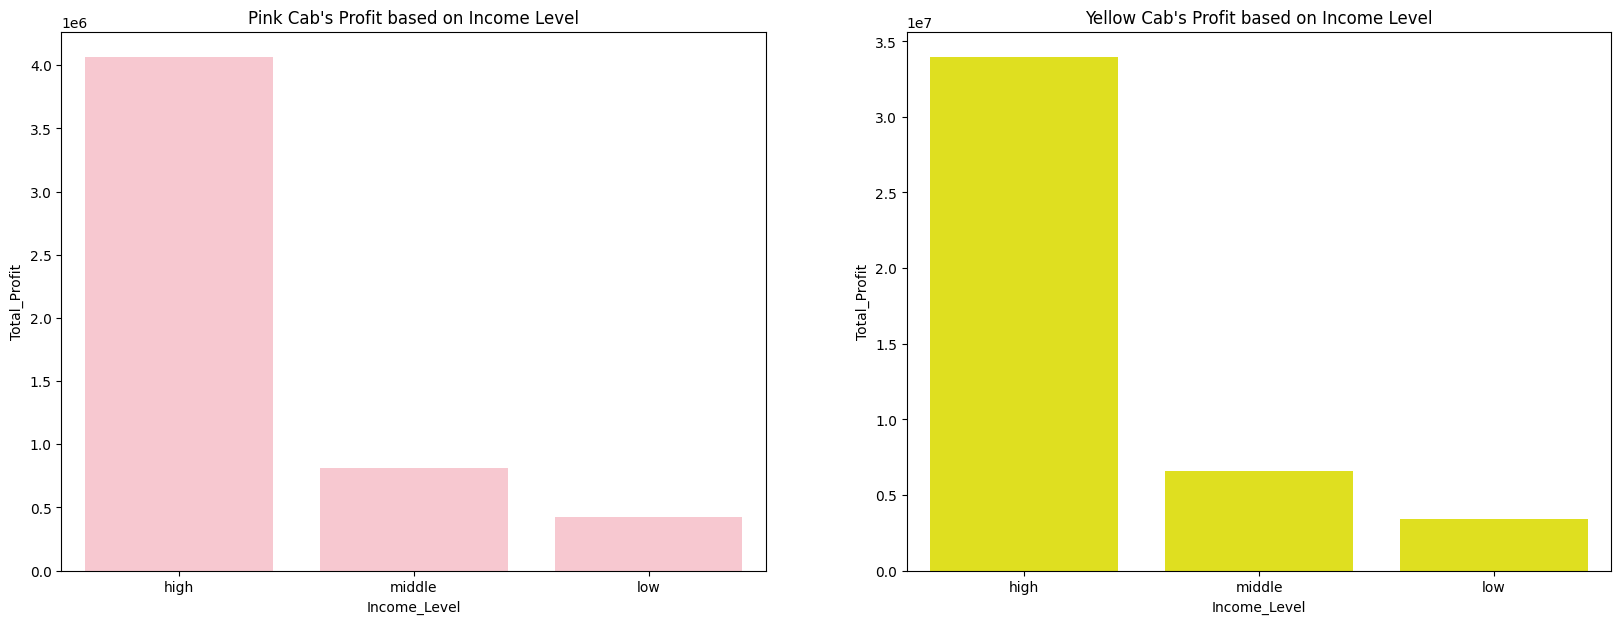

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.barplot(data = pink_income_df, x = "Income_Level", y = "Total_Profit", color="pink", ax = ax1)
ax1.set_title("Pink Cab's Profit based on Income Level")
sns.barplot(data = yellow_income_df, x = "Income_Level", y = "Total_Profit", color="yellow", ax = ax2)
ax2.set_title("Yellow Cab's Profit based on Income Level")

# Hypothesis Testing

# Null Hypothesis: Profit is the same regardless of gender for the Pink and Yellow Cab company

In [42]:
a = pink_data[(pink_data.Gender=='Female')].groupby('Transaction_ID').Profit.mean()
b = pink_data[(pink_data.Gender=='Male')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that there is a statistical difference')
else:
    print('Accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

Accept null hypothesis that there is no statistical difference
P value is  0.12143927855441171


Pink Cab: There is not a significant difference in Profit between the two genders for the Pink Cab company.

In [43]:
a = yellow_data[(yellow_data.Gender=='Female')].groupby('Transaction_ID').Profit.mean()
b = yellow_data[(yellow_data.Gender=='Male')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that there is a statistical difference')
else:
    print('Accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

Accept alternate hypothesis that there is a statistical difference
P value is  4.436110449440239e-25


Yellow Cab: There is a satistical difference in profit between the two genders for the Yellow Cab Company.

# Null Hypothesis: Profit is the same regardless of Income for both companies

In [47]:
a = yellow_data[(yellow_data["Income_(USD/Month)"] > 8000)].groupby('Transaction_ID').Profit.mean()
b = yellow_data[(yellow_data["Income_(USD/Month)"] <= 8000)].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that there is a statistical difference')
else:
    print('Accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

Accept alternate hypothesis that there is a statistical difference
P value is  6.6595235373862755e-06


Yellow Cab: There is a difference in profit depending on the customer's income for the Yellow Cab company.

In [50]:
a = pink_data[(pink_data["Income_(USD/Month)"] > 8000)].groupby('Transaction_ID').Profit.mean()
b = pink_data[(pink_data["Income_(USD/Month)"] <= 8000)].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that there is a statistical difference')
else:
    print('Accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

Accept null hypothesis that there is no statistical difference
P value is  0.37020339437492156


Pink Cab: There is not a significant difference in profit depending on the customer's income for the Pink Cab company.

# Null Hypothesis: Profit is the same regardless of age for both companies

In [49]:
a = pink_data[(pink_data["Age"] > 50)].groupby('Transaction_ID').Profit.mean()
b = pink_data[(pink_data["Age"] <= 50)].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that there is a statistical difference')
else:
    print('Accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

Accept null hypothesis that there is no statistical difference
P value is  0.3469569748181729


Pink Cab: There is not a significant difference in profit based on age for the Pink Cab Company.

In [51]:
a = yellow_data[(yellow_data["Age"] > 50)].groupby('Transaction_ID').Profit.mean()
b = yellow_data[(yellow_data["Age"] <= 50)].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that there is a statistical difference')
else:
    print('Accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

Accept alternate hypothesis that there is a statistical difference
P value is  7.3918601554003365e-09


Yellow Cab: There is a difference in profit based on age for the Yellow Cab company.

# Null Hypothesis: Retention is the same between the two companies.

In [90]:
a = retention_count["Transaction_Count_p"]
b = retention_count["Transaction_Count_y"]

from scipy import stats
_, p_value = stats.ttest_ind(a,b,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that there is a statistical difference')
else:
    print('Accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

Accept alternate hypothesis that there is a statistical difference
P value is  0.0


The retention count of customers of both companies are not the same. 